['D:\\gabriel\\Uni\\Master\\gitHub\\micro-cocome-statistics\\measurements/pub_sub_1_to_1_db_distributed\\callBackData\\pub_sub_1_to_1_db_callback_data_2020_09_16.csv']
['D:\\gabriel\\Uni\\Master\\gitHub\\micro-cocome-statistics\\measurements/pub_sub_one_db_distributed\\callBackData\\pub_sub_one_db_distributed_callback_data_2020_09_26.csv']
['D:\\gabriel\\Uni\\Master\\gitHub\\micro-cocome-statistics\\measurements/message_bus_1_to_1_db_distributed\\callBackData\\message_bus_1_to_1_db_distributed_callback_data_2020_09_26.csv']
['D:\\gabriel\\Uni\\Master\\gitHub\\micro-cocome-statistics\\measurements/orchestrate_pub_sub_1_to_1_db\\callBackData\\orchestrate_pub_sub_1_to_1_db_callback_data_2020_09_26.csv']
Fitting the Model...
The intercept: -4926017406041280.0
The coefficient for cbs_rest is -1.6e+13
The coefficient for cbs_db is -1.6e+13
The coefficient for cbs_messaging is -1.6e+13
The coefficient for apg is -1.6e+15
The coefficient for cbca_sync is 4.9e+15
The coefficient for cbca_async 

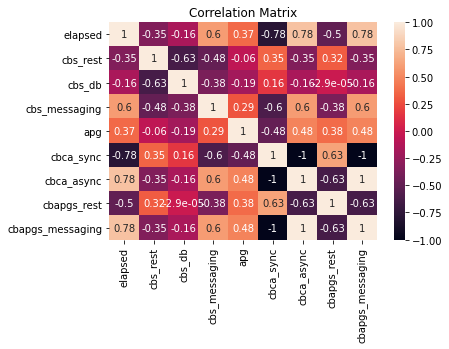

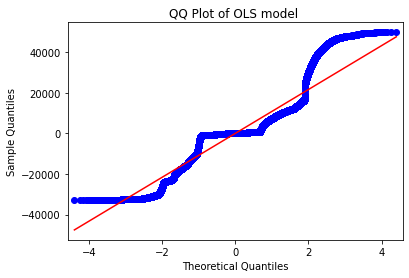

In [1]:
import pandas as pd
from glob import iglob, glob
import numpy as np
import pylab
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor


pd.set_option('max_columns', None)

def get_data_from_csv(absolut_path, dir_name, column_names):
    path = r'{}/{}/*.csv'.format(absolut_path, dir_name)
    file_path = glob(path,  recursive=True)
    print(file_path)
    return pd.read_csv(file_path[0], skipinitialspace=True, usecols=column_names)


def get_data_from_csv_files(absolut_path, dir_name, column_names):
    path = r'{}\{}\*.csv'.format(absolut_path, dir_name)
    return pd.concat((pd.read_csv(f, skipinitialspace=True, usecols=column_names) for f in iglob(path, recursive=True)),
                     ignore_index=True)


def remove_outliers(data_frame):
    z = np.abs(stats.zscore(data_frame['elapsed']))
    return data_frame[(z < 3)]


def get_callback_dir(dir_name, call_back):
    return r'{}\{}'.format(dir_name, call_back)


absolutPath = r'D:\gabriel\Uni\Master\gitHub\micro-cocome-statistics\measurements'
callBack = r'callBackData'

ag1to1 = r'api_gateway_1_to_1_db_distributed'
agOne = r'api_gateway_one_db_distributed'
m1to1 = r'master_1_to_1_db_distributed'
mOne = r'master_one_db_distributed'
oAg1to1 = r'orchestrate_api_gateway_1_to_1_db_distributed'
ps1tot1 = r'pub_sub_1_to_1_db_distributed'
psOne = r'pub_sub_one_db_distributed'
mb1to1 = r'message_bus_1_to_1_db_distributed'
opb1to1 = r'orchestrate_pub_sub_1_to_1_db'

fields = ['elapsed']
fieldsAsync = ['timeStamp', 'uuid']
fieldsAsyncCallback = ['time_received', 'uuid']

# master_1_to_1_db_distributed
master1to1 = get_data_from_csv_files(absolutPath, m1to1, fields)

master1to1['cbs_rest'] = 1
master1to1['cbs_db'] = 0
master1to1['cbs_messaging'] = 0
master1to1['apg'] = 0
master1to1['cbca_sync'] = 1
master1to1['cbca_async'] = 0
master1to1['cbapgs_rest'] = 0
master1to1['cbapgs_messaging'] = 0

# master_one_db_distributed
masterOne = get_data_from_csv_files(absolutPath, mOne, fields)

masterOne['cbs_rest'] = 0
masterOne['cbs_db'] = 1
masterOne['cbs_messaging'] = 0
masterOne['apg'] = 0
masterOne['cbca_sync'] = 1
masterOne['cbca_async'] = 0
masterOne['cbapgs_rest'] = 0
masterOne['cbapgs_messaging'] = 0

# api_gateway_1_to_1_db
apg1to1 = get_data_from_csv_files(absolutPath, ag1to1, fields)

apg1to1['cbs_rest'] = 1
apg1to1['cbs_db'] = 0
apg1to1['cbs_messaging'] = 0
apg1to1['apg'] = 1
apg1to1['cbca_sync'] = 1
apg1to1['cbca_async'] = 0
apg1to1['cbapgs_rest'] = 1
apg1to1['cbapgs_messaging'] = 0

# api_gateway_one_db
apgOne = get_data_from_csv_files(absolutPath, agOne, fields)

apgOne['cbs_rest'] = 0
apgOne['cbs_db'] = 1
apgOne['cbs_messaging'] = 0
apgOne['apg'] = 1
apgOne['cbca_sync'] = 1
apgOne['cbca_async'] = 0
apgOne['cbapgs_rest'] = 1
apgOne['cbapgs_messaging'] = 0


# pub_sub_1_to_1_db_distributed
pubSub1to1 = get_data_from_csv_files(absolutPath, ps1tot1, fieldsAsync)
pubSub1to1Callback = get_data_from_csv(absolutPath, get_callback_dir(ps1tot1, callBack), fieldsAsyncCallback)

pubSub1to1Aggregate = pubSub1to1.join(pubSub1to1Callback.set_index('uuid'), on='uuid')
pubSub1to1Aggregate['elapsed'] = pubSub1to1Aggregate['time_received'] - pubSub1to1Aggregate['timeStamp']

pubSub1to1All = pubSub1to1Aggregate[['elapsed']].copy()

pubSub1to1All['cbs_rest'] = 1
pubSub1to1All['cbs_db'] = 0
pubSub1to1All['cbs_messaging'] = 0
pubSub1to1All['apg'] = 1
pubSub1to1All['cbca_sync'] = 0
pubSub1to1All['cbca_async'] = 1
pubSub1to1All['cbapgs_rest'] = 0
pubSub1to1All['cbapgs_messaging'] = 1


# pub_sub_one_db_distributed
pubSubOne = get_data_from_csv_files(absolutPath, psOne, fieldsAsync)
pubSubOneCallback = get_data_from_csv(absolutPath, get_callback_dir(psOne, callBack), fieldsAsyncCallback)

pubSubOneAggregate = pubSubOne.join(pubSubOneCallback.set_index('uuid'), on='uuid')
pubSubOneAggregate['elapsed'] = pubSubOneAggregate['time_received'] - pubSubOneAggregate['timeStamp']

pubSubOneAll = pubSubOneAggregate[['elapsed']].copy()

pubSubOneAll['cbs_rest'] = 0
pubSubOneAll['cbs_db'] = 1
pubSubOneAll['cbs_messaging'] = 0
pubSubOneAll['apg'] = 1
pubSubOneAll['cbca_sync'] = 0
pubSubOneAll['cbca_async'] = 1
pubSubOneAll['cbapgs_rest'] = 0
pubSubOneAll['cbapgs_messaging'] = 1


# message_bus_1_to_1_db_distributed
mbus1to1 = get_data_from_csv_files(absolutPath, mb1to1, fieldsAsync)
mbus1to1Callback = get_data_from_csv(absolutPath, get_callback_dir(mb1to1, callBack), fieldsAsyncCallback)

mbus1to1Aggregate = mbus1to1Callback.join(mbus1to1.set_index('uuid'), on='uuid')
mbus1to1Aggregate['elapsed'] = mbus1to1Aggregate['time_received'] - mbus1to1Aggregate['timeStamp']

mbus1to1All = mbus1to1Aggregate[['elapsed']].copy()

mbus1to1All['cbs_rest'] = 0
mbus1to1All['cbs_db'] = 0
mbus1to1All['cbs_messaging'] = 1
mbus1to1All['apg'] = 1
mbus1to1All['cbca_sync'] = 0
mbus1to1All['cbca_async'] = 1
mbus1to1All['cbapgs_rest'] = 0
mbus1to1All['cbapgs_messaging'] = 1

# orchestrate_api_gateway_1_to_1_db_distributed
oApi1to1 = get_data_from_csv_files(absolutPath, oAg1to1, fields)

oApi1to1['cbs_rest'] = 1
oApi1to1['cbs_db'] = 0
oApi1to1['cbs_messaging'] = 0
oApi1to1['apg'] = 1
oApi1to1['cbca_sync'] = 1
oApi1to1['cbca_async'] = 0
oApi1to1['cbapgs_rest'] = 1
oApi1to1['cbapgs_messaging'] = 0




# orchestrate_pub_sub_1_to_1_db
oPubSub1to1 = get_data_from_csv_files(absolutPath, opb1to1, fieldsAsync)
oPubSub1to1Callback = get_data_from_csv(absolutPath, get_callback_dir(opb1to1, callBack), fieldsAsyncCallback)

oPubSub1to1Aggregate = oPubSub1to1Callback.join(oPubSub1to1.set_index('uuid'), on='uuid')
oPubSub1to1Aggregate['elapsed'] = oPubSub1to1Aggregate['time_received'] - oPubSub1to1Aggregate['timeStamp']

oPubSub1to1All = oPubSub1to1Aggregate[['elapsed']].copy()

oPubSub1to1All['cbs_rest'] = 0
oPubSub1to1All['cbs_db'] = 0
oPubSub1to1All['cbs_messaging'] = 1
oPubSub1to1All['apg'] = 1
oPubSub1to1All['cbca_sync'] = 0
oPubSub1to1All['cbca_async'] = 1
oPubSub1to1All['cbapgs_rest'] = 0
oPubSub1to1All['cbapgs_messaging'] = 1

# create a data frame containing all data frames

all_data = master1to1.append(masterOne, ignore_index=True).append(apg1to1, ignore_index=True)
all_data = all_data.append(apgOne, ignore_index=True).append(pubSub1to1All, ignore_index=True).append(pubSubOneAll, ignore_index=True)
all_data = all_data.append(mbus1to1All, ignore_index=True).append(oApi1to1, ignore_index=True).append(oPubSub1to1All, ignore_index=True)

#print(all_data.describe())

# print out correlation matrix for the all_data dataframe https://youtu.be/8DhvVs59It4?t=405
# https://datatofish.com/correlation-matrix-pandas/
corrMatrix = all_data.corr()
#print(corrMatrix)

# display matrix
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix')
#plt.show()

# define the input variable and the output variable
x = all_data.drop('elapsed', axis=1)
y = all_data[['elapsed']]

# split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# create instance of our model
regression_model = LinearRegression()

# fit the model
print("Fitting the Model...")
regression_model.fit(x_train, y_train)

# grab the intercept and the coef
intercept = regression_model.intercept_[0]
print("The intercept: {}".format(intercept))

coef = regression_model.coef_[0]
#print(coef)

for cf in zip(x.columns, coef):
    print("The coefficient for {} is {:.2}".format(cf[0], cf[1]))

# get multiple predictions
y_predict = regression_model.predict(x_test)

# show first five
print('Show first five predictions: ')
print(y_predict[:5])


# EVALUATING THE MODEL https://youtu.be/UTfoj_7RU48?t=248
# define our input
x2 = sm.add_constant(x)

# create an OLS model
model = sm.OLS(y, x2)

# fit the data
est = model.fit()

# check for normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.title('QQ Plot of OLS model ')
pylab.show()



# # testing
# _, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog, robust=False)
# print(pval, f_pval) # no Heteroscedasticity
#
# # AUTOCORRELATION https://youtu.be/UTfoj_7RU48?t=799
#
# # calculate the lag
# lag = min(10, (len(x) // 5))
# # perform Ljung-Box test
# test_results = diag.acorr_ljungbox(est.resid, lags=lag)
#
# # grab the p-values and the test statistics
# ibvalue, p_val = test_results
#
# # print the results of the test
# if min(p_val) > 0.05:
#     print("The lowest p-value found was {:.4}".format(min(p_val)))
#     print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
#     print('-'*100)
# else:
#     print("The lowest p-value found was {:.4}".format(min(p_val)))
#     print("We reject the null hypthoesis, so there is autocorrelation.")
#     print('-'*100)
#
# # plot autocorrelation
# #sm.graphics.tsa.plot_acf(est.resid)
# #plt.show()
#
# # check for normality of the residuals
# sm.qqplot(est.resid, line='s')
# pylab.show()
#
# # check that the mean of the residuals is approx 0
# mean_residuals = sum(est.resid) / len(est.resid)
# print(mean_residuals)
